In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import exposure as ex

In [2]:
def he(img):
    # Check if the image is grayscale
    if len(img.shape) == 2:
        # Apply histogram equalization to the grayscale image
        outImg = ex.equalize_hist(img) * 255
    elif len(img.shape) == 3:
        # Apply histogram equalization to each RGB channel
        outImg = np.zeros_like(img, dtype=np.float32)
        for channel in range(img.shape[2]):
            outImg[:, :, channel] = ex.equalize_hist(img[:, :, channel]) * 255

    # Ensure pixel values are within the valid range [0, 255]
    outImg = np.clip(outImg, 0, 255)
    return outImg.astype(np.uint8)

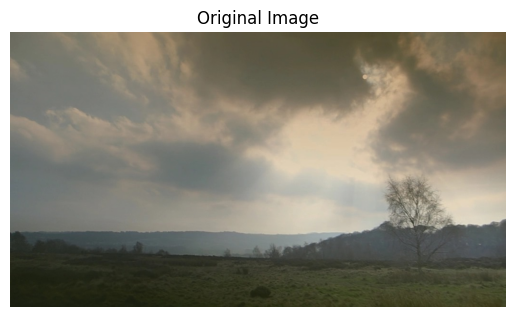

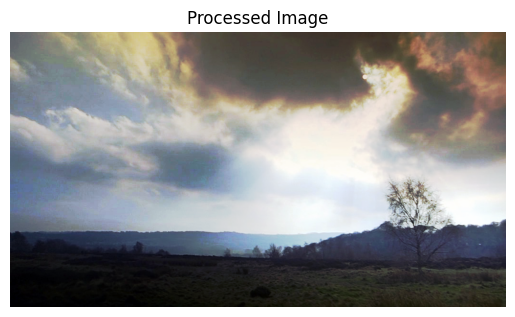

In [3]:
def main():
    # Load the image using OpenCV
    img_name = r"degraded.jpg"
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for displaying

    # Display the original image
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Apply histogram equalization
    result = he(img)

    # Display the processed image
    plt.title("Processed Image")
    plt.imshow(result)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()
